<a href="https://colab.research.google.com/github/Aisha20-ESP/Neural_Network_AI/blob/main/NN_from_scratch_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [ ]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y = y.reshape((y.shape[0],1))
print('Dimension de X:',X.shape)
print('Dimension de y:',y.shape)

Dimension de X: (100, 2)
Dimension de y: (100, 1)


In [ ]:
def initialisation(X):
  W = np.random.randn(X.shape[1],1)
  b = np.random.randn(1)
  return (W, b)

In [ ]:
# testttttttttttt((((((((((()))))))))))
def model(X,W,b):
  Z = X.dot(W) + b
  A = 1/(1 + np.exp(-Z))
  return A

In [ ]:
A = model(X,W,b)
A.shape

(100, 1)

In [ ]:
def logLoss(A,y):
  return 1 /len(y) * np.sum(-y * np.log(A) -(1-y) * np.log(1-A))

In [ ]:
def grad_Descent(A,X,y):
  dW = 1 /len(y) * np.dot(X.T,A-y)
  db = 1 / len(y) * np.sum(A-y)
  return (dW, db)

In [ ]:
dW ,db =grad_Descent(A,X,y)
dW.shape
db

-0.4648918279120396

In [ ]:
def update(dW,db,W,b,learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W,b)

In [ ]:
def Artificial_NN (X,y,learning_rate=0.1,n_iter=100):

  # Initialisation de W,b
  W,b = initialisation(X)
  # Learning loop
  Loss = []
  for i in range(n_iter):

    A = model(X,W,b)
    Loss.append(logLoss(A,y))
    dW,db = grad_Descent (A,X,y)
    W,b = update (dW,db,W,b,learning_rate)
  y_predict = predict(X,W,b)
  print (accuracy_score(y,y_predict))
    # Learning figure
  plt.plot(Loss)
  plt.show()
  return (W,b)

In [ ]:
def predict(X,W,b):
  A = model(X,W,b)
  # print (A)
  return A >= 0.5

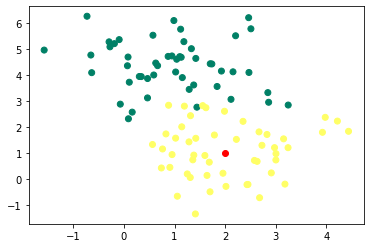

[0.87128984]


array([ True])

In [ ]:
new_plant = np.array([2,1])
plt.scatter(X[:,0],X[:,1],c = y,cmap ='summer')
plt.scatter(new_plant[0],new_plant[1] ,c='r')
plt.show()
predict(new_plant,W,b)

In [ ]:
W ,b 

(array([[ 0.94724605],
        [-1.07728163]]), array([1.09520117]))

[[0.93609434]
 [0.81149122]
 [0.00955866]
 [0.21023694]
 [0.94577839]
 [0.37276856]
 [0.0853776 ]
 [0.90900752]
 [0.06551904]
 [0.88663506]
 [0.04251667]
 [0.87901989]
 [0.03014143]
 [0.02842039]
 [0.72245499]
 [0.96493857]
 [0.98668685]
 [0.05385669]
 [0.79014127]
 [0.6823918 ]
 [0.0533005 ]
 [0.0487049 ]
 [0.42854236]
 [0.00909811]
 [0.94022233]
 [0.04083491]
 [0.90549676]
 [0.01066188]
 [0.07206218]
 [0.71679572]
 [0.9738126 ]
 [0.05318833]
 [0.72565523]
 [0.9741098 ]
 [0.41839473]
 [0.21315732]
 [0.8024946 ]
 [0.54106093]
 [0.44846519]
 [0.54712773]
 [0.11106581]
 [0.06023275]
 [0.0017714 ]
 [0.18278793]
 [0.2441509 ]
 [0.82473771]
 [0.96429697]
 [0.96161322]
 [0.00938542]
 [0.01318702]
 [0.93681997]
 [0.63706919]
 [0.03735969]
 [0.04564971]
 [0.75032674]
 [0.05072592]
 [0.65005962]
 [0.83543918]
 [0.93111402]
 [0.9877889 ]
 [0.67786923]
 [0.17459574]
 [0.00843722]
 [0.90660644]
 [0.01718069]
 [0.38333892]
 [0.05637533]
 [0.55117482]
 [0.91764363]
 [0.26932157]
 [0.19785292]
 [0.92

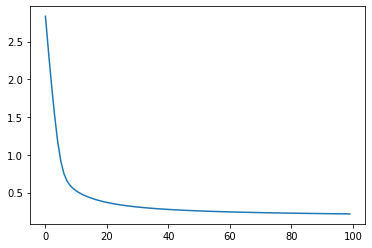

[[ 0.94724605]
 [-1.07728163]] [1.09520117]


In [ ]:
 W,b = Artificial_NN(X,y)
 print (W,b)

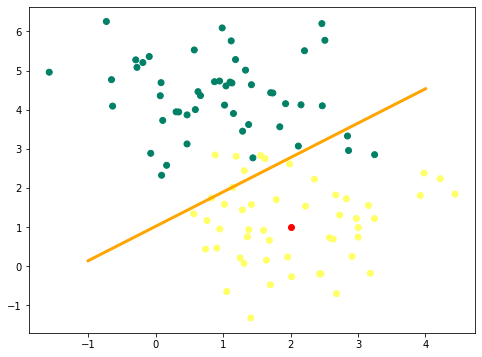

[0.87128984]


array([ True])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
new_plant = np.array([2,1])
x0 = np.linspace(-1,4,100)
x1 = (-W[0] * x0 - b)/ W[1]

plt.scatter(new_plant[0],new_plant[1] ,c='r')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()
predict(new_plant,W,b)
# print(W,b)

In [ ]:
import plotly.graph_objects as go


In [ ]:
# Visualisations 3D
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()